🪷 lilypond builds up on existing visualizations of the SOM yet still provides a way to display these traditional views of the trained SOM to compare with the pond visual.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from minisom import MiniSom
from lilypond.basin import Basin

In [2]:
RAND = 42
DATA_DIR = "./data/synthetic-2d-3-cluster"

In [3]:
X = pd.read_csv(f"{DATA_DIR}/X.csv", header=None, index_col=0)
X.columns = [0, 1]

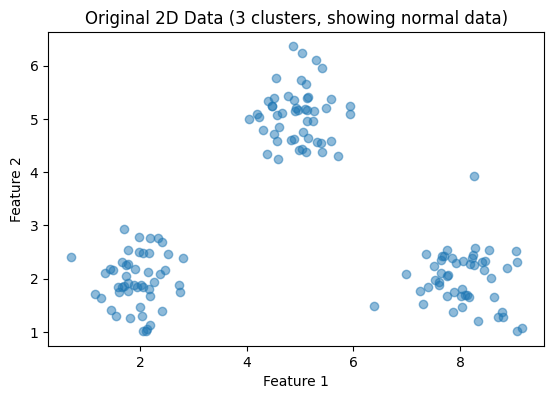

In [4]:
plt.figure()

plt.scatter(X.loc[:, 0], X.loc[:, 1], alpha=0.5)

plt.title("Original 2D Data (3 clusters, showing normal data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.gca().axes.set_aspect("equal")
plt.show()

In [5]:
# train SOM

data = X.to_numpy()

som = MiniSom(x=10, y=10, input_len=2, sigma=1.5, learning_rate=0.5, random_seed=RAND)
som.random_weights_init(data)
som.train(data, num_iteration=30, use_epochs=True, verbose=True)

print("")
print("Topographic error:", som.topographic_error(data))
print("Quantization error:", som.quantization_error(data).round(4))

 [ 4500 / 4500 ] 100% - 0:00:00 left 
 quantization error: 0.10274380609493336

Topographic error: 0.05333333333333334
Quantization error: 0.1027


In [6]:
# creating pond

basin = Basin(som, data, verb=True).prepare()
pond = basin.legacy_pond()

Basin has been initialized.
Basin has been prepared.
LegacyPond has been initialized.


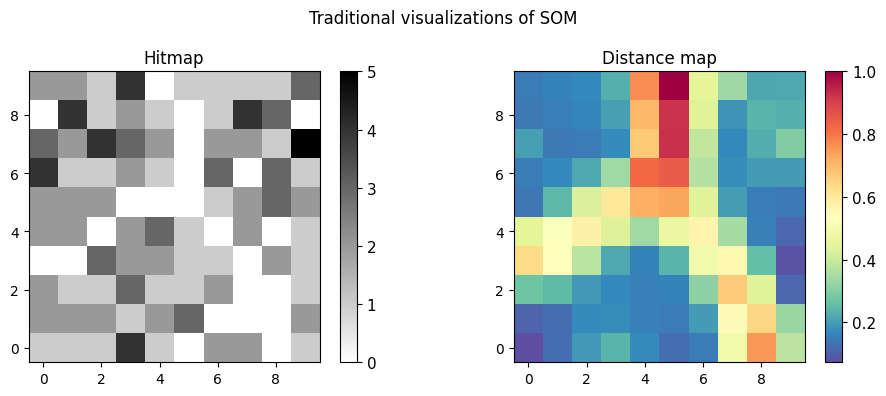

In [7]:
# traditional visualizations

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ax = axes[0]
pond.visualize_hitmap(ax=ax)

ax = axes[1]
pond.visualize_distance_map(ax=ax)

plt.suptitle("Traditional visualizations of SOM")

plt.tight_layout()
plt.show()

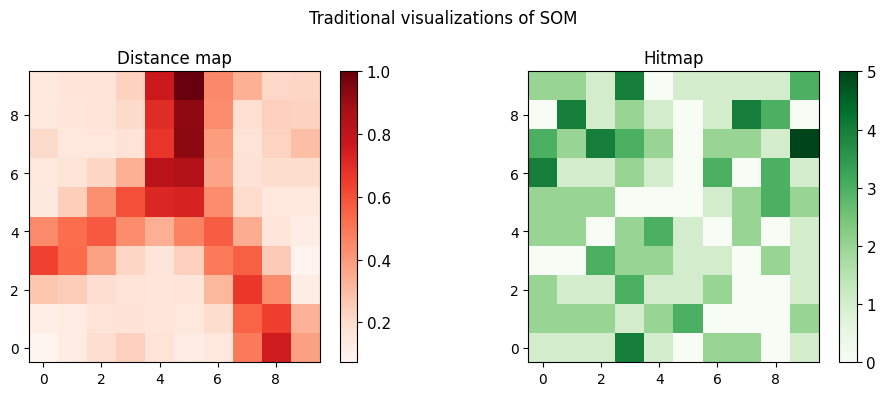

In [10]:
pond.visualize(cmaps=["Reds", "Greens"])